## Part I: Perform data analysis of the dataset

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from scipy import stats

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv', index_col=0)

In [3]:
df.head(5)
df.info() # Gives information about number of rows and columns in the data frame along with the data type of each column
df.shape # gives a tuple of number of (rows,cols)
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null 

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [4]:
# Dropping the columns that are not required for our analysis

# Dropping empty and insignificant columns 
df = df.drop("EASE-MENT", axis=1)
df = df.drop("SALE DATE", axis=1)
# Dropping unnamed column
df = df[df.columns.dropna()]
df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null 

In [5]:
# Modifying data types to appropriate types
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  object  
 2   BUILDING CLASS CATEGORY         84548 non-null  object  
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   BUILDING CLASS AT PRESENT       84548 non-null  object  
 7   ADDRESS                         84548 non-null  object  
 8   APARTMENT NUMBER                84548 non-null  object  
 9   ZIP CODE                        84548 non-null  int64   
 10  RESIDENTIAL UNITS               84548 non-null  int64   
 11  COMMERCIAL UNITS                84548 non-null  int64   
 12  TOTAL UNITS        

### Data Cleaning and Data Visualisation

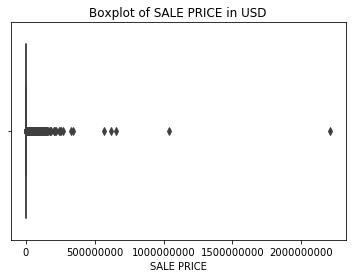

In [6]:
# Target variable is SALE PRICE. Visualizing its range.
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [7]:
df.isnull().sum()
# Remove records with NULL SALE PRICE as this is the target variable for the model
print("Number of rows before removing null values",len(df))
df = df[df['SALE PRICE'].notnull()]
print("Number of rows after removing null values",len(df))


Number of rows before removing null values 84548
Number of rows after removing null values 69987


In [8]:
# Sales prices range between 0 to 2210000000. Restricting the range of sales prices to remove outliers.
# Remove observations that fall outside those caps
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 6000000)]
print("Number of rows after filtering sale price value ",len(df))

Number of rows after filtering sale price value  55167


Text(0.5, 1, 'Correlation between the features of the dataset before data cleaning')

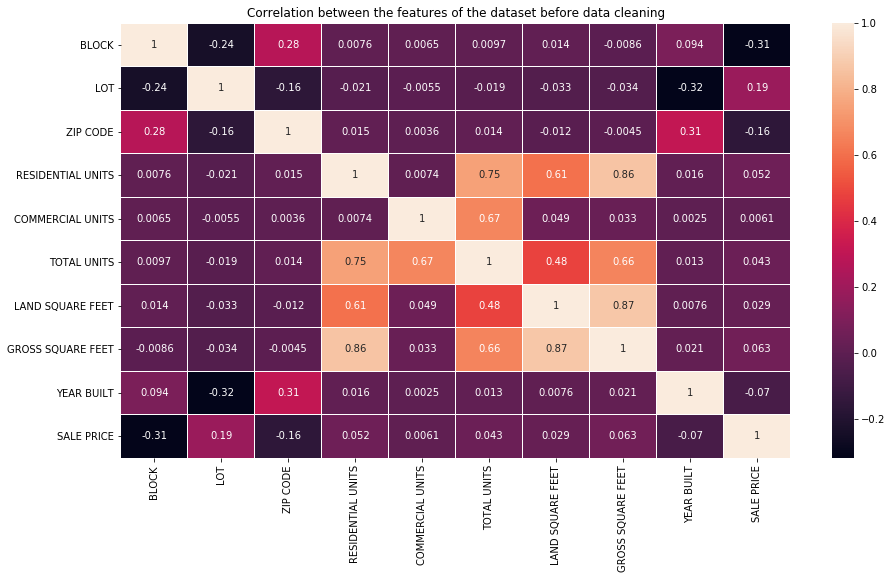

In [9]:
# Correlation between the all the numeric features of the dataset without any data cleaning
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr,linewidths=.05, annot=True)
plt.title("Correlation between the features of the dataset before data cleaning")

In [10]:
#numeric correlation between Sale price (target variable) and other features
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
LOT                  0.186974
GROSS SQUARE FEET    0.063069
RESIDENTIAL UNITS    0.052109
TOTAL UNITS          0.043045
LAND SQUARE FEET     0.028695
COMMERCIAL UNITS     0.006111
YEAR BUILT          -0.070192
ZIP CODE            -0.158091
BLOCK               -0.313448
Name: SALE PRICE, dtype: float64

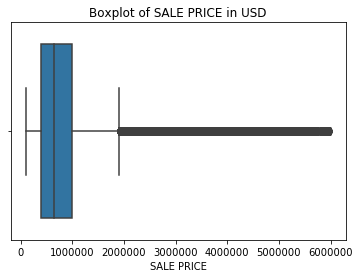

In [11]:

# Plotting SALE PRICE. The outliers are removed.
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

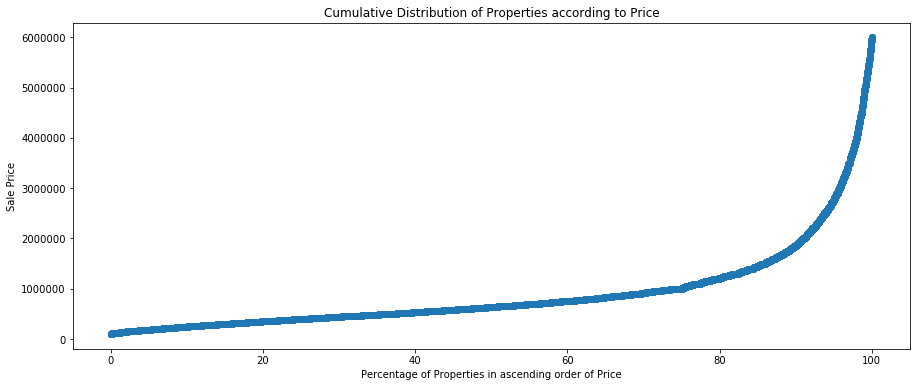

In [12]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Distribution of properties according to prices 
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY'] = 1
x['PROPERTY'] = x['PROPERTY'].cumsum()
x['PROPERTY'] = 100* x['PROPERTY'] / len(x['PROPERTY'])
# # Plot the data and configure the settings
plt.plot(x['PROPERTY'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')


Text(0.5, 1.0, 'Distribution of Sale Price values')

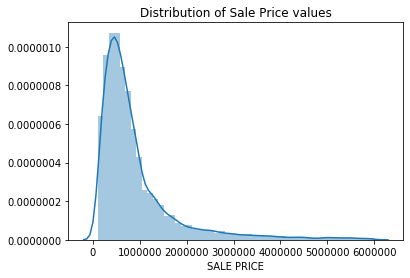

In [13]:
sns.distplot(df['SALE PRICE'])
plt.title("Distribution of Sale Price values")

In [14]:
# Removes all NULL values for LAND SQUARE FEET and GROSS SQUARE FEET
df = df[df['LAND SQUARE FEET'].notnull()] 
df = df[df['GROSS SQUARE FEET'].notnull()] 
len(df)

34982

In [15]:
# Keeps properties with fewer than 20,000 Square feet and greater than 0 Square feet
# df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] <2000)]
df = df[(df['GROSS SQUARE FEET'] >0) & (df['GROSS SQUARE FEET'] < 20000)]
df = df[(df['LAND SQUARE FEET'] >0) & df['LAND SQUARE FEET'] < 20000]

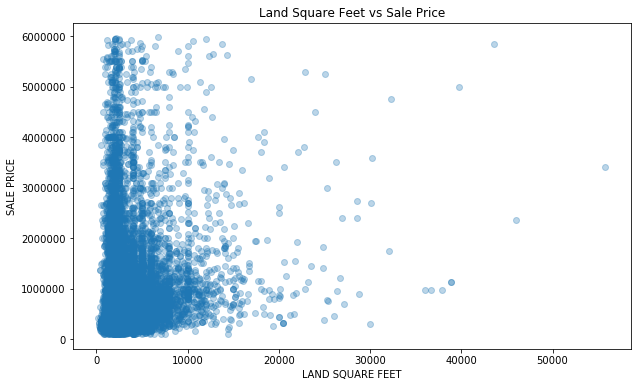

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3},ci=None)
plt.title('Land Square Feet vs Sale Price')
plt.show()

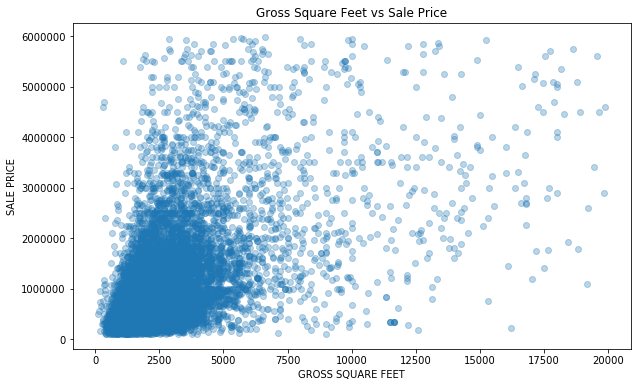

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

#### Although there are many exceptions, on a general trend we find the sale price to be increasing as the gross square feet increases, in a majority of cases.

In [18]:
df.isnull().sum()
# Remove records with NULL SALE PRICE as this is the target variable for the model

df = df[df['TOTAL UNITS'].notnull()]
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] <2000)]

df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]
print("Number of records after restricting sale price range",len(df))


Number of records after restricting sale price range 26778


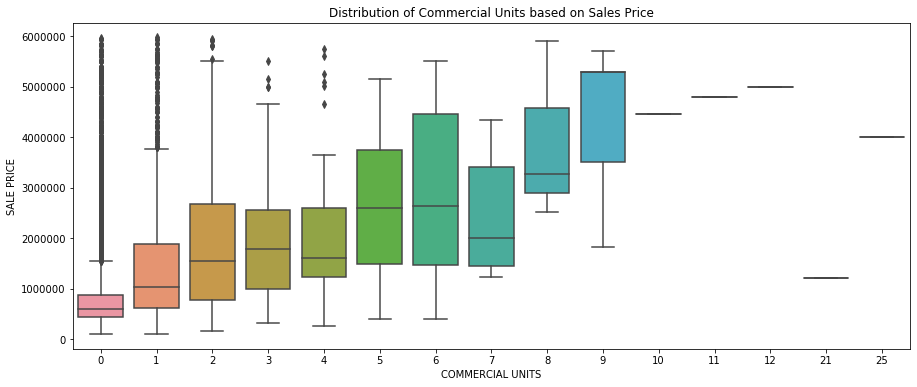

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Distribution of Commercial Units based on Sales Price')
plt.show()

In [20]:
# Year built data varies from 0 to 2017. Restricting the range to 1800 and above. 
print("Number of records before filtering based on age of building",len(df))
df = df[df['YEAR BUILT'] >= 1800]
# Calculating the age of a building
df['BUILDING AGE'] = pd.datetime.now().year - df['YEAR BUILT']
print("Number of records after filtering based on age of building",len(df))

Number of records before filtering based on age of building 26778
Number of records after filtering based on age of building 26770


c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


Text(0.5, 1, 'Correlation between numeric features of the data set after cleaning')

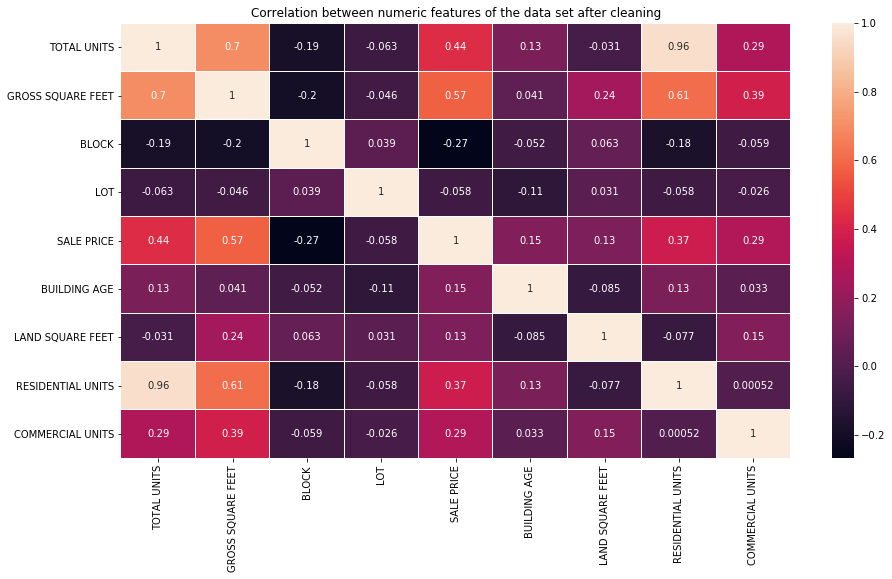

In [21]:
# Correlation between the numeric features of the data set after data cleaning.
plt.figure(figsize=(15,8))
d= df[['TOTAL UNITS','GROSS SQUARE FEET','BLOCK','LOT','SALE PRICE', 'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 
         'COMMERCIAL UNITS','TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']]
corr = d.corr()
sns.heatmap(corr,linewidths=.05, annot=True)
plt.title("Correlation between numeric features of the data set after cleaning")

In [22]:
#Choosing only the variables used in the model
columns = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','TAX CLASS AT TIME OF SALE','GROSS SQUARE FEET',
       'SALE PRICE', 'BUILDING AGE']
data_model = df.loc[:,columns]
data_model.columns

Index(['BOROUGH', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS',
       'TAX CLASS AT TIME OF SALE', 'GROSS SQUARE FEET', 'SALE PRICE',
       'BUILDING AGE'],
      dtype='object')

In [23]:
# Take the log and normalise the column Sale price
data_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(data_model['SALE PRICE']).values.reshape(-1,1))

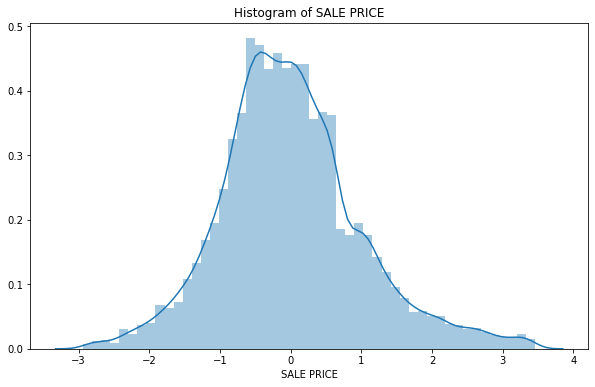

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(data_model['SALE PRICE'])
plt.title('Histogram of SALE PRICE')
plt.show()

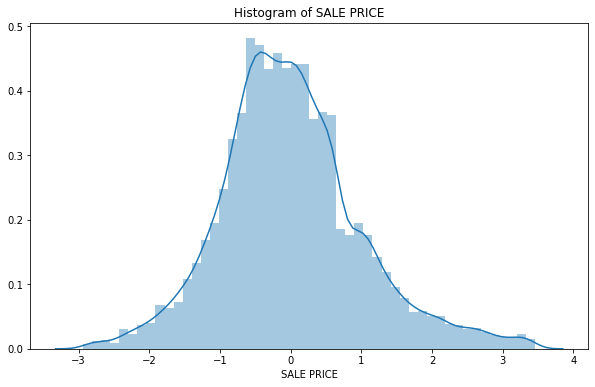

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(data_model['SALE PRICE'])
plt.title('Histogram of SALE PRICE')
plt.show()

Text(0.5, 1.0, 'Tax Class vs Sale Price')

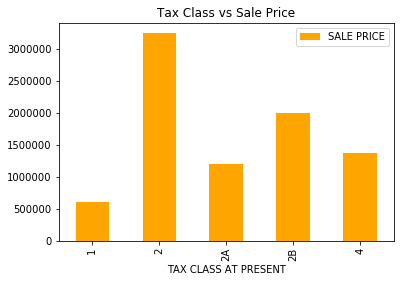

In [26]:

pivot=df.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
pivot.plot(kind='bar', color='orange')
plt.title("Tax Class vs Sale Price")


#### Observed trend: More the tax class, more is the price of a property.

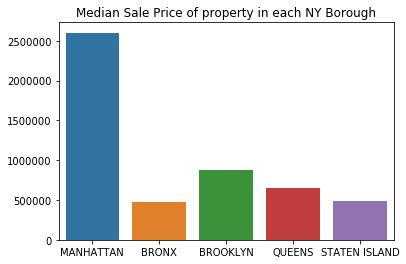

In [27]:
xlabel=['MANHATTAN','BRONX', 'BROOKLYN','QUEENS','STATEN ISLAND']
medians = df.groupby('BOROUGH')['SALE PRICE'].median().tolist()
plt.title("Median Sale Price of property in each NY Borough")
sns.barplot(x=xlabel, y=medians)

#### Observed: Manhanttan has the highest prices of properties

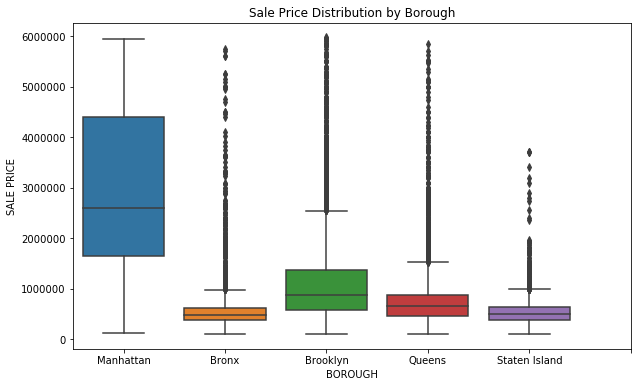

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
plt.xticks([0,1,2,3,4,5],['Manhattan','Bronx','Brooklyn','Queens','Staten Island'])
plt.title('Sale Price Distribution by Borough')
plt.show()

## Part II: Apply ML analysis

In [29]:
data_model.columns

Index(['BOROUGH', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS',
       'TAX CLASS AT TIME OF SALE', 'GROSS SQUARE FEET', 'SALE PRICE',
       'BUILDING AGE'],
      dtype='object')

In [30]:
# Converting String or categorical features to one hot encoder representation
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY']
one_hot_encoded = pd.get_dummies(data_model[one_hot_features])

In [31]:
input_df = data_model.drop(one_hot_features,axis=1)
input_df = pd.concat([input_df, one_hot_encoded] ,axis=1)

In [32]:
target_df = input_df['SALE PRICE']
ip_df = input_df.drop('SALE PRICE', axis=1)

In [33]:
#Splitting data into test and train
X_train ,X_test, Y_train , Y_test = train_test_split(ip_df , target_df , test_size = 0.2)

### MODEL 1: LINEAR REGRESSION

In [34]:
error=[]
r2score=[]
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lin = lr.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_lin))
print("Root means squared error for Linear regression is ",rmse)
error.append(rmse)



Root means squared error for Linear regression is  0.8017580886197034


### MODEL 2: LASSO 

In [35]:
alpha=0.00099
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, Y_train)
Y_pred_lasso=lasso_regr.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_lasso))
print("Root means squared error for Lasso regression is ",rmse)
error.append(rmse)



Root means squared error for Lasso regression is  0.802032298516469


### MODEL 3: RIDGE REGRESSION

In [36]:
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_ridge))
print("Root means squared error Ridge regression is ",rmse)
error.append(rmse)

Root means squared error Ridge regression is  0.8016632768215182


### MODEL 4: RANDOM FOREST

In [37]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_rf))
print("Root means squared error for Random Forest is ",rmse)
error.append(rmse)



Root means squared error for Random Forest is  0.7967481190468435


### MODEL 5: ELASTIC NET REGRESSION

In [38]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.01)
elastic.fit(X_train, Y_train)
elastic_preds = elastic.predict(X_test)
elastic_error = np.sqrt(mean_squared_error(Y_test, elastic_preds))
error.append(elastic_error)
print("Root means squared error for Elastic Net Regression: ",elastic_error)


Root means squared error for Elastic Net Regression:  0.8072085148824508


### MODEL 6: ADABOOST REGRESSION

In [39]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, Y_train)
ada_preds = regr.predict(X_test)
ada_error =  np.sqrt(mean_squared_error(Y_test, ada_preds))
error.append(ada_error)
print("Root means squared error for Adaboost is: ",ada_error)


Root means squared error for Adaboost is:  0.8162799293590418


### Comparison of the results of ML models

Text(0.5, 1.0, 'RMSE for each model')

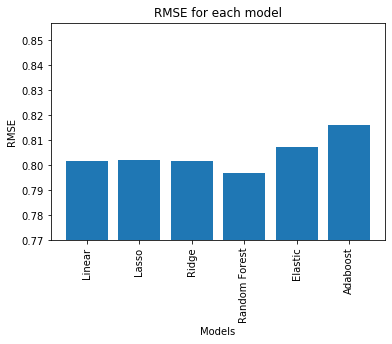

In [40]:
models = ['Linear','Lasso','Ridge', 'Random Forest','Elastic','Adaboost']

plt.bar(models, error)
plt.xticks(models,rotation='vertical')
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.ylim(bottom=0.77)
plt.title("RMSE for each model")

###### INFERENCE:
Out of the chosen models, random forest gives the best error rate. It handles missing values data and maintains accuracy for a major part of the data. It trains portions of data taking a fraction of columns multiple times to give better accuracy. Random Forest model will be less prone to overfitting than Decision tree, and gives a more generalized solution. Linear, Lasso and Ridge regressiosn have almost the same error rate. Elastic net has slightly better performance than the former three. 

## Part III: Employ multiple datasets and extract insights

In [41]:
df1 = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year.csv', index_col=0)

c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\15103\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [42]:
df1.info()
df1 = df1[df1['Work Location Borough'].isin(xlabel)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194488 entries, 2016 to 2017
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Agency Name                 object 
 1   Last Name                   object 
 2   First Name                  object 
 3   Mid Init                    object 
 4   Agency Start Date           object 
 5   Work Location Borough       object 
 6   Title Description           object 
 7   Leave Status as of June 30  object 
 8   Base Salary                 object 
 9   Pay Basis                   object 
 10  Regular Hours               float64
 11  Regular Gross Paid          object 
 12  OT Hours                    float64
 13  Total OT Paid               object 
 14  Total Other Pay             object 
dtypes: float64(2), object(13)
memory usage: 267.9+ MB


In [43]:
df1["Base Salary"] = df1["Base Salary"].astype(str)
df1["Regular Gross Paid"] = df1["Regular Gross Paid"].astype(str)
df1["Total OT Paid"] = df1["Total OT Paid"].astype(str)
df1["Total Other Pay"] = df1["Total Other Pay"].astype(str)
df1["Base Salary"] = df1["Base Salary"].str.replace('$','')
df1["Regular Gross Paid"] = df1["Regular Gross Paid"].str.replace('$','')
df1["Total OT Paid"] = df1["Total OT Paid"].str.replace('$','')
df1["Total Other Pay"] = df1["Total Other Pay"].str.replace('$','')
df1["Regular Gross Paid"] = df1["Regular Gross Paid"].str.strip()
df1["Pay Basis"] = df1["Pay Basis"].str.strip()

#Convert them back
df1["Base Salary"] = df1["Base Salary"].astype(float)
df1["Base Salary"] = df1["Base Salary"].astype(int)
df1["Regular Gross Paid"] = df1["Regular Gross Paid"].astype(float)
df1["Total OT Paid"] = df1["Total OT Paid"].astype(float)
df1["Total Other Pay"] = df1["Total Other Pay"].astype(float)
df1.head()

df1.describe()


,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,58264.000000,58264.000000,58264.000000,58264.000000,58264.000000,58264.000000
mean,65908.017730,1588.314529,54919.064528,187.561214,10877.696978,7605.661743
std,30718.012563,793.645014,36594.070367,199.393000,12387.840879,8105.372013
min,10.000000,-168.000000,-29862.190000,-6.580000,-1754.100000,-126343.180000
25%,42819.000000,1133.127500,25802.537500,0.000000,207.950000,1000.000000
50%,78026.000000,2091.420000,48146.210000,134.135000,6555.705000,5561.685000
75%,80177.250000,2091.420000,84324.250000,321.057500,17645.490000,14459.092500
max,219773.000000,2161.130000,487277.630000,1459.500000,84435.580000,100355.840000


In [44]:
combined_df = df.merge(df1, left_index=True, right_index=True)

In [45]:
df['BOROUGH'].replace({1:"MANHATTAN",2:"BRONX",3:"BROOKLYN",4:"QUEENS",5:"STATEN ISLAND"},inplace=True)

In [46]:
medians = df.groupby('BOROUGH')['SALE PRICE'].median()
medians2= df1.groupby('Work Location Borough')['Base Salary'].median() #.tolist()

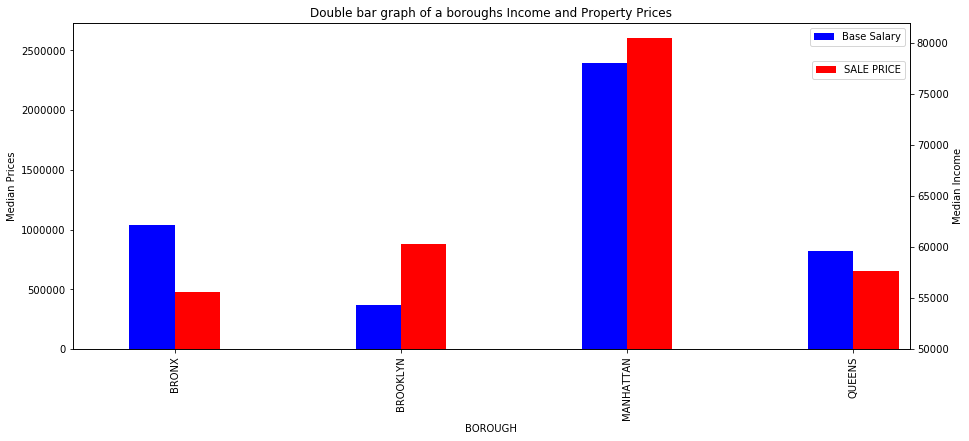

In [47]:

fig = plt.figure(figsize=(15,6)) # Create matplotlib figure


ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

k1=medians.plot(kind='bar', color='red', ax=ax, width=width, position=0)
k2=medians2.plot(kind='bar', color='blue', ax=ax2, width=width, position=1)


ax.set_ylabel('Median Prices')
ax2.set_ylabel('Median Income')
plt.title('Double bar graph of a borough''s Income and Property Prices')

ax2.legend(loc='upper right')
ax.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.9))
plt.ylim(bottom=50000)
plt.show()

### Correlation
The variables chosen to obtain a correlation are income and price of property. There is no definite trend among these variables. Higher property price does not necessarily have to mean higher income. Price of a property can depend on various other factors like the house condition, area of the house, age on the building. As stated in [1] "Given the current ample stock of houses, at the high-end of the market, a demand surge led by an increase in the income share of the top income quintile may not put pressure on house prices. In addition, the declining income share of bottom three income quintiles may lead to a reduction in their housing demand". 

##  
DATASETS:
1. New York Sales: https://www.kaggle.com/new-york-city/report
2. New York Payroll: https://www.kaggle.com/new-york-city/nyc-citywide-payroll-data

REFERENCES:
1. https://www.sciencedirect.com/science/article/pii/S1303070119300538
2. https://pandas.pydata.org/pandas-docs/version/0.18.1/
3. https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
4. https://matplotlib.org/3.3.0/contents.html#
5. https://seaborn.pydata.org/tutorial.html
    

